In [2]:
import sys, os
import numpy as np
sys.path.append('../src/')
import torch
from mgnn.MolGraphNetwork import MolGraphNetwork
from utils import find_repo_root
from scf_guess_tools import Backend
from scf_guess_datasets import Qm9IsomeresMd

project_root_dir = find_repo_root()
print("Project root directory:", project_root_dir)
BASIS_PATH = "../../../scripts/6-31g_2df_p_custom_nwchem.gbs"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
#Current best trial: ebffc_00023 with loss=3.290987253189087 and params={'batch_size': 16, 'hidden_dim': 512, 'message_passing_steps': 6, 'edge_threshold_val': 1., 'message_net_dropout': 0.09772288864576731, 'dat5122788896881607a_aug_factor': 1.0, 'message_net_layers': 5, 'lr': 0.0003257920597967229, 'weight_decay': 3.460137919135933e-06, 'num_epochs': 50, 'grace_epochs': 5, 'lr_factor': 0.5, 'lr_patience': 3, 'lr_threshold': 0.001, 'lr_cooldown': 2, 'lr_min': 1e-06}




Project root directory: /home/ewachmann/REPOS/Masterarbeit
Using device: cuda


In [5]:
local_pc_path = os.path.join(project_root_dir, "datasets/QM9") if str(device) != "cuda" else "/home/dmilacher/datasets/data1"
dataset = Qm9IsomeresMd(
    local_pc_path, 
    size = 500, # number of molecules to load
    val=0.1, # using 80% training / 10 % val / 10% test split
    test=0.1
)


In [6]:
MGNN = MolGraphNetwork(dataset=dataset,
                       basis=BASIS_PATH,
                       backend=Backend.PY,
                       batch_size=16,
                       hidden_dim=256,
                       message_passing_steps=4,
                       edge_threshold_val=3,
                       message_net_layers=3,
                       message_net_dropout=0.15,
                       target="density",
                       data_aug_factor=2,
                       verbose_level=2)
MGNN.load_data()

Setting verbose level to: 2
Loading 500 files from qm9_isomeres_md...
Loading 400 files for train set from /home/ewachmann/REPOS/Masterarbeit/scf_guess_datasets/scf_guess_datasets/qm9_isomeres_md/xyz...


AssertionError: Number of coordinates 16 does not match number of atoms 19 in file /home/ewachmann/REPOS/Masterarbeit/scf_guess_datasets/scf_guess_datasets/qm9_isomeres_md/xyz/2198_3683.xyz

In [22]:
RETRAIN = True  
model_name = "MGNN_6-31G_NO_AUG_scratch"
if not RETRAIN and os.path.exists(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth"):
    MGNN.load_model(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth")
else:
    MGNN.train_model(num_epochs=100, lr=0.00268, weight_decay=1.78e-5, grace_epochs=10, model_save_path=f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth", loss_on_full_matrix=True)
    MGNN.save_model(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth")

Epoch 1 [Train]: 100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


Epoch 1/100 → Avg Train Loss: 268153.758955


Epoch 1 [Val]: 100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch 1/100 → Avg Val   Loss: 9904.308594
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_NO_AUG_scratch.pth


Epoch 2 [Train]: 100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


Epoch 2/100 → Avg Train Loss: 5838.582285


Epoch 2 [Val]: 100%|██████████| 4/4 [00:00<00:00,  8.57it/s]


Epoch 2/100 → Avg Val   Loss: 7781.723633
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_NO_AUG_scratch.pth


Epoch 3 [Train]: 100%|██████████| 50/50 [00:42<00:00,  1.19it/s]


Epoch 3/100 → Avg Train Loss: 4321.753511


Epoch 3 [Val]: 100%|██████████| 4/4 [00:00<00:00,  8.61it/s]


Epoch 3/100 → Avg Val   Loss: 6894.371094
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_NO_AUG_scratch.pth


Epoch 4 [Train]: 100%|██████████| 50/50 [00:44<00:00,  1.13it/s]


Epoch 4/100 → Avg Train Loss: 3568.949214


Epoch 4 [Val]: 100%|██████████| 4/4 [00:00<00:00,  8.21it/s]


Epoch 4/100 → Avg Val   Loss: 5800.592773
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_NO_AUG_scratch.pth


Epoch 5 [Train]: 100%|██████████| 50/50 [01:14<00:00,  1.49s/it]


Epoch 5/100 → Avg Train Loss: 3306.795381


Epoch 5 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]


Epoch 5/100 → Avg Val   Loss: 5619.770508
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_NO_AUG_scratch.pth


Epoch 6 [Train]: 100%|██████████| 50/50 [00:48<00:00,  1.02it/s]


Epoch 6/100 → Avg Train Loss: 3232.891050


Epoch 6 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]


Epoch 6/100 → Avg Val   Loss: 5667.402344


Epoch 7 [Train]: 100%|██████████| 50/50 [00:49<00:00,  1.01it/s]


Epoch 7/100 → Avg Train Loss: 3201.769165


Epoch 7 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.79it/s]


Epoch 7/100 → Avg Val   Loss: 6656.972656


Epoch 8 [Train]: 100%|██████████| 50/50 [00:46<00:00,  1.06it/s]


Epoch 8/100 → Avg Train Loss: 3483.215581


Epoch 8 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]


Epoch 8/100 → Avg Val   Loss: 5751.570801


Epoch 9 [Train]:  40%|████      | 20/50 [00:47<01:11,  2.38s/it]


Training interrupted by user. Benchmark model...


Epoch 9 [Test]: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Test  Loss: 5802.510742
Model saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_NO_AUG_scratch.pth


/home/etschgi1/miniconda3/envs/scf_guess_1_0/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b)

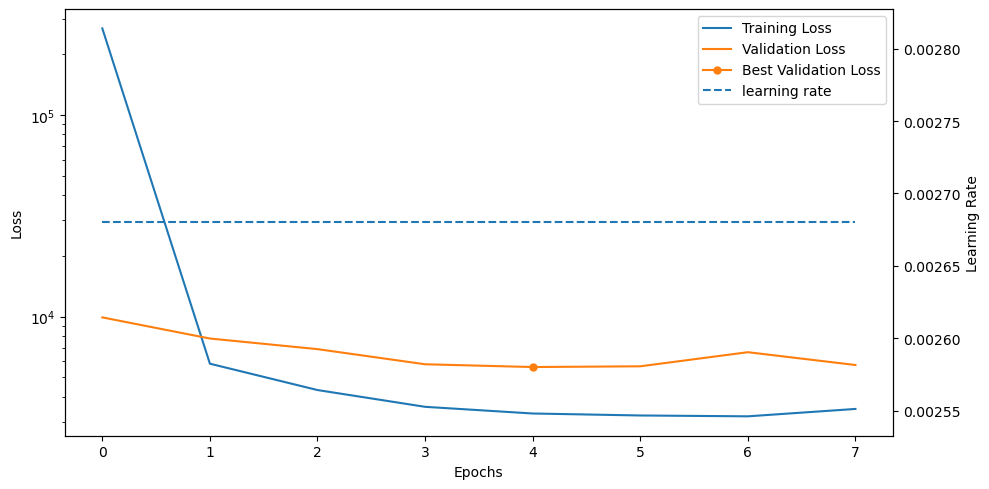

In [24]:
import pickle
from matplotlib import pyplot as plt
with open(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.history", "rb") as f: 
    hist = pickle.load(f)
# hist["train_loss"]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(hist["train_loss"], label="Training Loss", color="tab:blue")
ax.plot(hist["val_loss"], label="Validation Loss", color="tab:orange")
ax.plot(np.array(hist["val_loss"]).argmin(), hist["val_loss"][np.array(hist["val_loss"]).argmin()],
         marker="o", markersize=5, color="tab:orange", label="Best Validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_yscale("log")
ax2 = ax.twinx()
ax2.plot(hist["lr"], linestyle="--", label="learning rate")
ax2.set_ylabel("Learning Rate")
ax2.tick_params(axis='y')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")
plt.tight_layout()
plt.show()

In [27]:
test_graphs = MGNN.get_graphs("test")

Testing on random sample with id 22


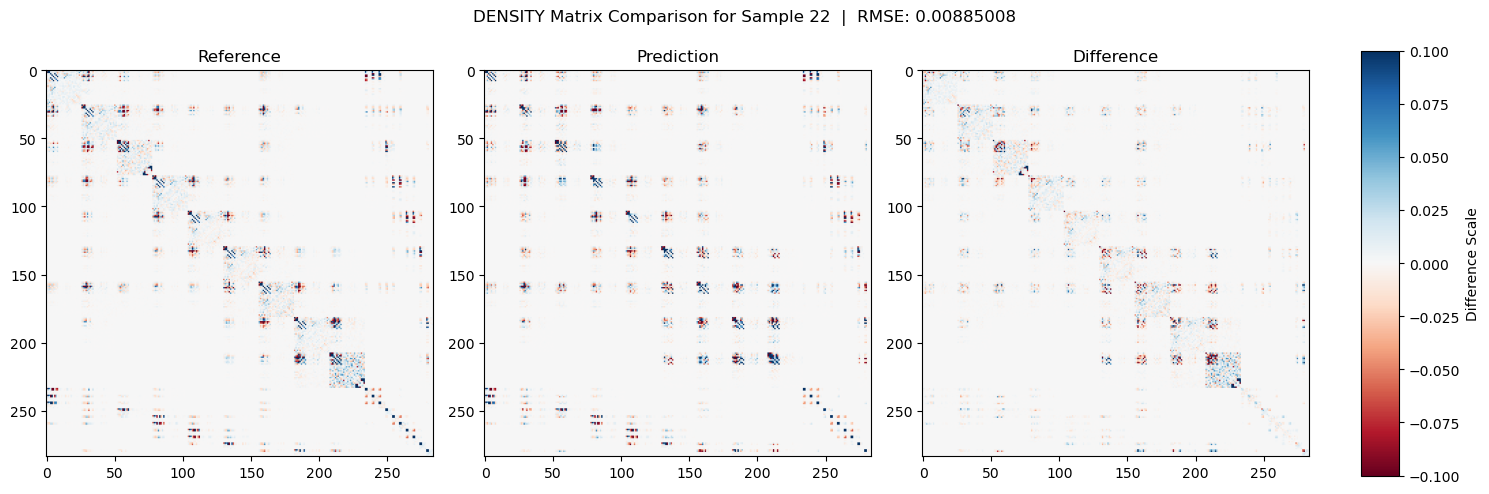

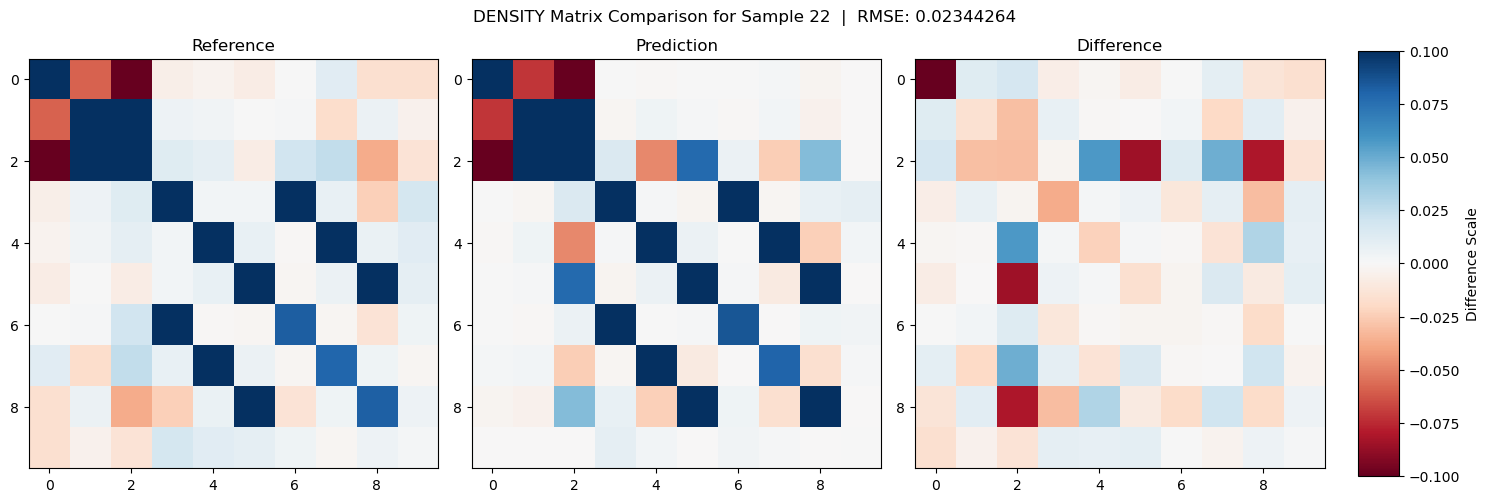

In [28]:
# aux code for testing
sys.path.append('../../')
from utils import plot_mat_comp

randsample_id = np.random.randint(0, len(test_graphs))
print(f"Testing on random sample with id {randsample_id}")
test_graph = test_graphs[randsample_id]
density_pred, density_truth = MGNN.predict([test_graph], include_target=True, transform_to_density=True)[0]
plot_mat_comp(density_pred, density_truth, 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.1)
plot_mat_comp(density_pred[:10,:10], density_truth[:10,:10], 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.1)

ok this already look pretty good for very few training runs!

In [ ]:
from scf_guess_tools import load, calculate, guess
from scipy.linalg import eigh
from pyscf import gto, scf

In [11]:
# default calc using minao guess!
rand_file = MGNN.get_files("test")[randsample_id]
print(rand_file)
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_minao = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess="minao")

/home/ewachmann/REPOS/Masterarbeit/scf_guess_datasets/scf_guess_datasets/qm9_isomeres/xyz/dsC7O2H10nsd_4415.xyz
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.108160684644


In [12]:
density_pred = density_pred.astype(np.float64)

In [13]:
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_own = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess=density_pred)

Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.108160685003


In [14]:
# ground truth guess
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_gt = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess=density_truth)

Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.10816068506


In [15]:
cycles_minao, cycles_own, cycles_gt = wf_minao.native.cycles, wf_own.native.cycles, wf_gt.native.cycles
print(f"Cycles with minao guess: {cycles_minao}, cycles with own guess: {cycles_own}, cycles with ground truth guess: {cycles_gt}")

Cycles with minao guess: 10, cycles with own guess: 13, cycles with ground truth guess: 13


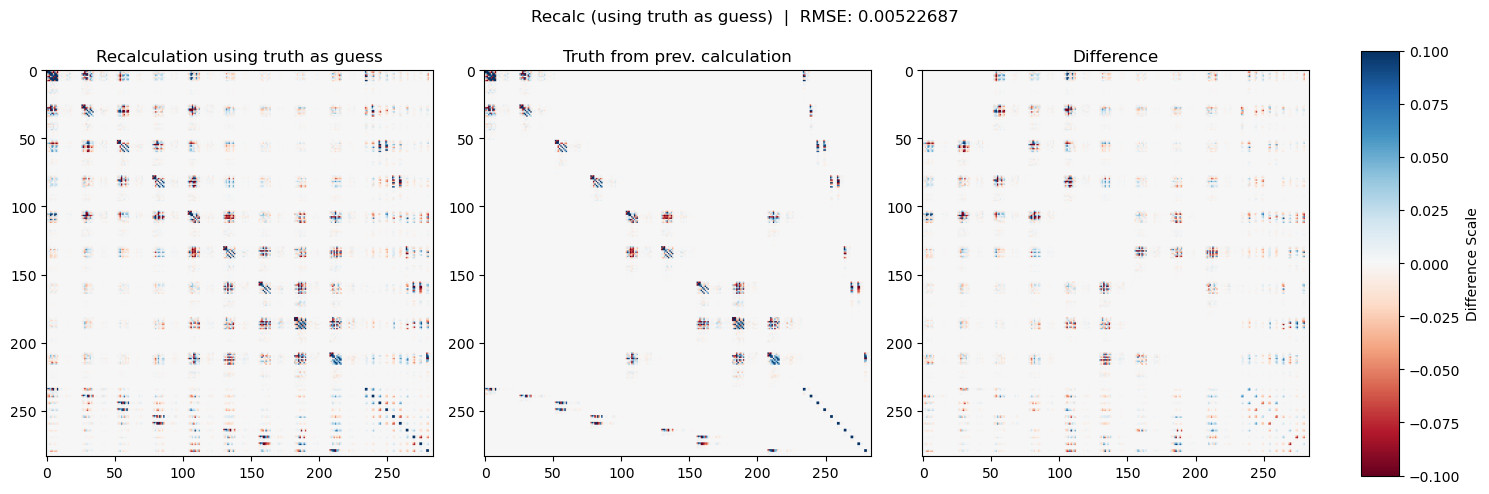

In [16]:
plot_mat_comp(wf_minao._D, density_truth, title="Recalc (using truth as guess)", ref_title="Recalculation using truth as guess", pred_title="Truth from prev. calculation", vmax=0.1)

# Iteration Benchmark

In [18]:
from time import time
from uncertainties import ufloat
import scf_guess_datasets

In [19]:
start_time = time()
density_preds = MGNN.predict(test_graphs, include_target=False, transform_to_density=True)

pred_time = time() - start_time # stat benchmarking later
print(f"Prediction time for {len(test_graphs)} samples: {pred_time:.2f} seconds - {pred_time/len(test_graphs):.4f} seconds per sample")

files = MGNN.get_files("test")
print(f"Number of test files: {len(files)}")

cycles =  []
print("Testing for iteration count")

Prediction time for 50 samples: 1.37 seconds - 0.0274 seconds per sample
Number of test files: 50
Testing for iteration count


In [20]:
# own 
test_keys = dataset.test_keys # only use half of the validation set -> which is the test set used by the model!
for i, density_pred in enumerate(density_preds):
    solver = dataset.solver(test_keys[i])
    overlap, hcore, density, fock, status = scf_guess_datasets.solve(solver, density_pred.astype(np.float64))
    cycles.append(status.iterations)
    print(f"Sample {i}: Cycles with own guess: {status.iterations}")


Sample 0: Cycles with own guess: 17
Sample 1: Cycles with own guess: 15


KeyboardInterrupt: 

# Iterations benchmark

In [ ]:
mean_own = np.mean(cycles)
std_own = np.std(cycles)
iter_own = ufloat(mean_own, std_own)
print(f"Average iterations with own guess: {iter_own:.2f}")
with open(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}_cycles.pkl", "wb") as f:
    pickle.dump(cycles, f)

Average iterations with own guess: 11.20+/-0.49


In [ ]:
scheme_iterations = {dataset.schemes[i]: [] for i in range(len(dataset.schemes))}
for key in dataset.test_keys: #! only use half of the validation set -> which is the test set used by the model!
    for scheme, sample in dataset.guesses(key).items():
        scheme_iterations[scheme].append(sample.status.iterations)
for scheme, iterations in scheme_iterations.items():
    print(f"{scheme}: {np.mean(iterations):.2f} +- {np.std(iterations):.2f} iterations")

1e: 18.80 +- 1.82 iterations
vsap: 14.18 +- 0.93 iterations
sap: 16.56 +- 1.90 iterations
minao: 10.76 +- 0.59 iterations


# Energy benchmark

In [ ]:
from pyscf import gto, dft

def create_mf_from_mol(mol: gto.Mole, xc: str = "b3lyp") -> dft.RKS:
    mf = dft.RKS(mol)
    mf.xc = xc
    mf.grids.build()  # ensures XC grid is initialized
    return mf

def build_fock_from_density(mf: dft.RKS, density):
    vj, vk = mf.get_jk(dm=density)
    vxc = mf.get_veff(mf.mol, dm=density)
    hcore = mf.get_hcore()
    return hcore + vj + vxc - 0.5 * vk
def energy_elec(fock, density, coreH): 
    return np.trace((fock+hcore) @ density)

def energy_err(e_pred, e_conv): 
    return e_conv - e_pred, e_pred/e_conv -1

In [ ]:
from scf_guess_datasets import solve
# sanity check
sample_key = 451
sample_from_ds = dataset.solution(sample_key)

xyz_base = "/home/ewachmann/REPOS/Masterarbeit/scf_guess_datasets/scf_guess_datasets/qm9_isomeres/xyz/dsC7O2H10nsd_"
key_str = f"0{sample_key}.xyz"
mol = load(xyz_base + key_str, basis=BASIS_PATH, backend=Backend.PY, symmetry=False)
sol_sample = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess="minao")
new_res = solve(dataset.solver(sample_key), None)


Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.104475963745


In [ ]:
print(dataset.names[sample_key])
print(MGNN.get_files("test")[sample_key - 450])

dsC7O2H10nsd_3178
/home/ewachmann/REPOS/Masterarbeit/scf_guess_datasets/scf_guess_datasets/qm9_isomeres/xyz/dsC7O2H10nsd_3178.xyz


In [ ]:
mf = create_mf_from_mol(mol.native, xc="b3lypg")
pred_density = MGNN.predict([test_graphs[1]], include_target=False, transform_to_density=True)[0]
fock_sample_pred = build_fock_from_density(mf, pred_density)

In [ ]:
# build all fock matrices
pred_focks = []
pred_overlaps = []
for i, pred_density in enumerate(density_preds):
    mol_file = xyz_base + f"0{i+450}.xyz"
    cur_mol = load(mol_file, basis=BASIS_PATH, backend=Backend.PY, symmetry=False).native
    mf = create_mf_from_mol(cur_mol, xc="b3lypg")
    pred_focks.append(build_fock_from_density(mf, pred_density))
    pred_overlaps.append(mf.get_ovlp())
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
# print(new_res[-1])
# again = solve(dataset.solver(451), new_res[2])
# print(again[-1])
# energy_elec(new_res[3], new_res[2], new_res[1])

Status(converged=True, iterations=11)
Status(converged=True, iterations=3)


-245.46267038113365

In [ ]:
# # pyscf raw
# mol = gto.Mole()
# mol.atom = xyz_base + key_str
# mol.basis = BASIS_PATH
# mol.charge = 0
# mol.spin = 0
# mol.symmetry = False
# # mol.cart = False
# mol.build()

# mf = scf.RKS(mol)
# mf.xc = "b3lypg"
# mf.init_guess = "minao"
# mf.kernel()
# density_pyscf = mf.make_rdm1()

converged SCF energy = -423.104475963713


In [ ]:
# plot_mat_comp(sol_sample.density().numpy, sample_from_ds.density, title=f"DENSITY Matrix Comparison for Sample {key_str}", vmax=0.1, ref_title="Recalc using minao & scf_guess_tools", pred_title="solution from dataset.solution(451)")
# plot_mat_comp(density_pyscf, sample_from_ds.density, title=f"DENSITY Matrix Comparison for Sample {key_str}", vmax=0.1, ref_title="Recalc using pyscf internal", pred_title="solution from dataset.solution(451)")
# plot_mat_comp(density_pyscf, sol_sample.density().numpy, title=f"DENSITY Matrix Comparison for Sample {key_str}", vmax=0.1, ref_title="Recalc using pyscf internal", pred_title="Recalc using minao & scf_guess_tools")

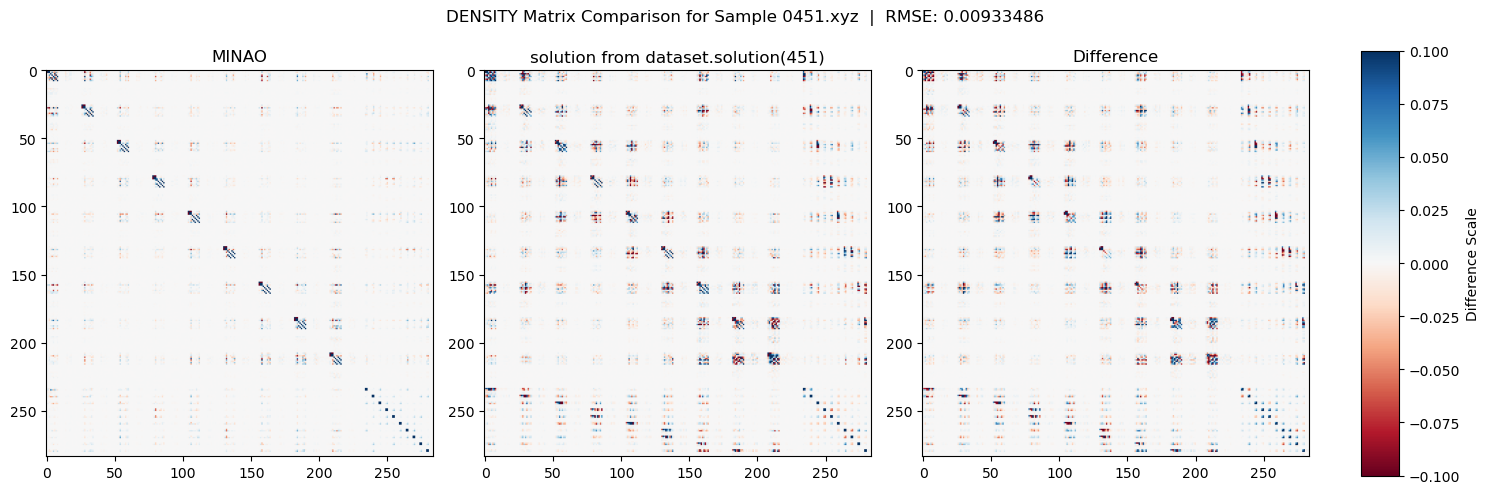

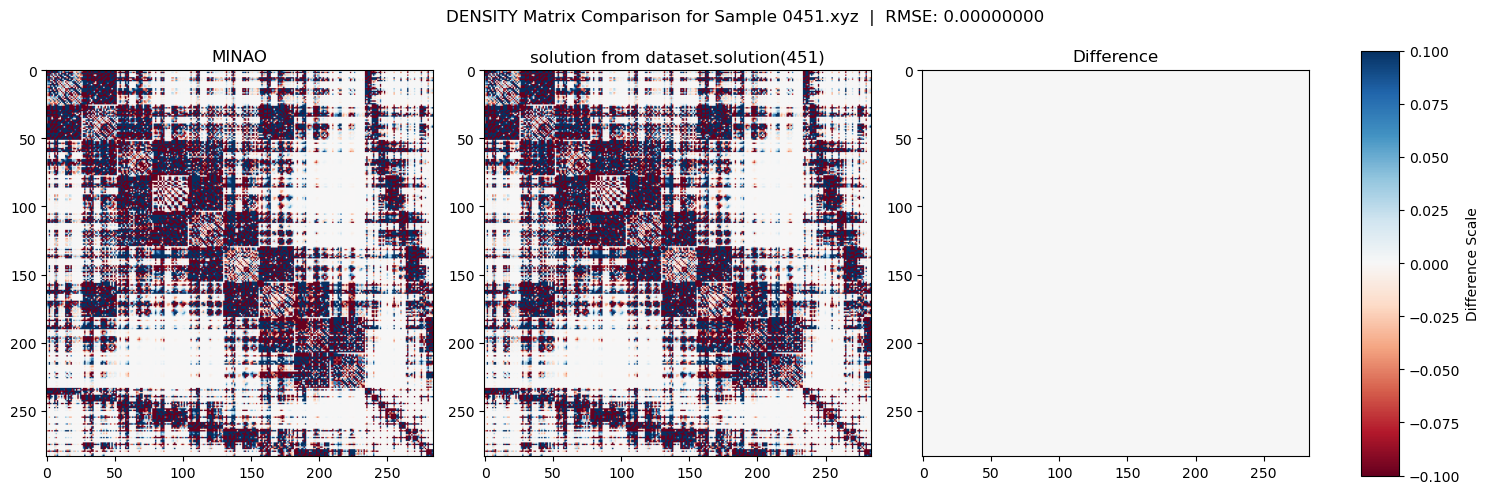

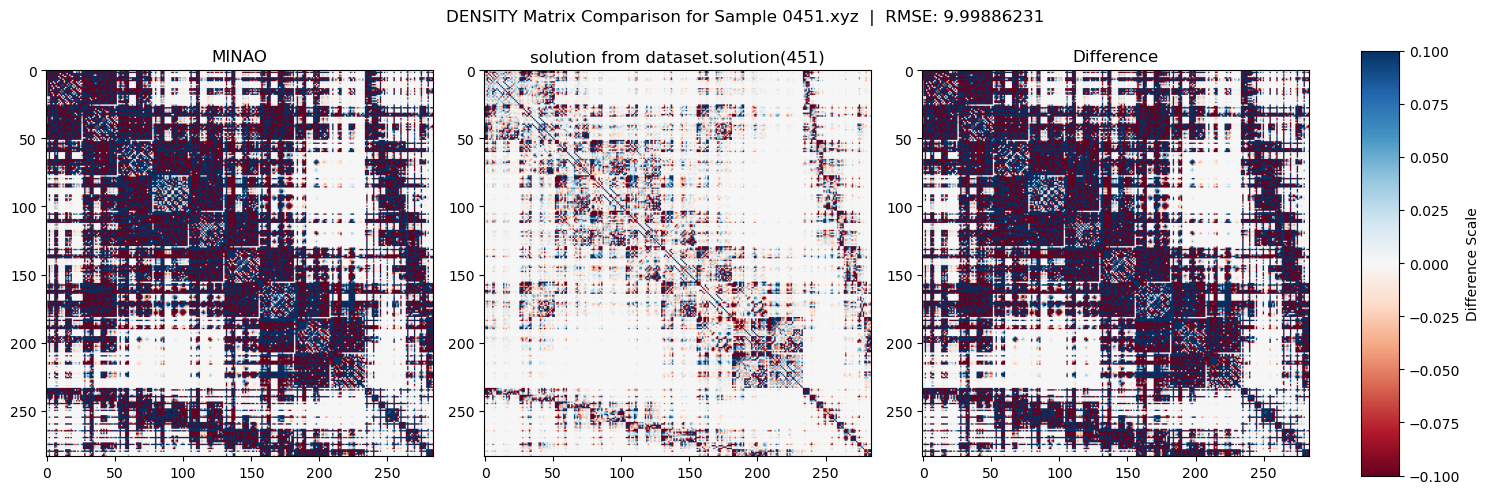

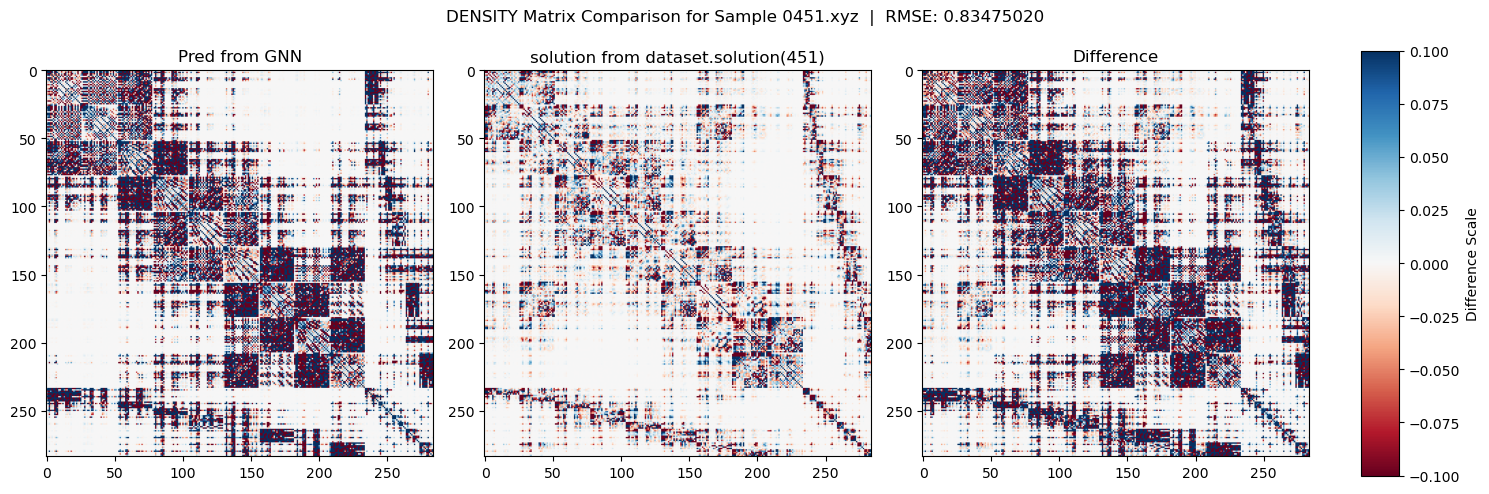

56913.40299803702
-75.63003780406966


In [ ]:
plot_mat_comp(dataset.guesses(sample_key)["minao"].density, sample_from_ds.density, title=f"DENSITY Matrix Comparison for Sample {key_str}", vmax=0.1, ref_title="MINAO", pred_title="solution from dataset.solution(451)")
plot_mat_comp(dataset.guesses(sample_key)["minao"].hcore, sample_from_ds.hcore, title=f"DENSITY Matrix Comparison for Sample {key_str}", vmax=0.1, ref_title="MINAO", pred_title="solution from dataset.solution(451)")
plot_mat_comp(dataset.guesses(sample_key)["minao"].fock, sample_from_ds.fock, title=f"DENSITY Matrix Comparison for Sample {key_str}", vmax=0.1, ref_title="MINAO", pred_title="solution from dataset.solution(451)")
plot_mat_comp(fock_sample_pred, sample_from_ds.fock, title=f"DENSITY Matrix Comparison for Sample {key_str}", vmax=0.1, ref_title="Pred from GNN", pred_title="solution from dataset.solution(451)")
print(dataset.guesses(sample_key)["minao"].fock.sum())
print(sample_from_ds.fock.sum())

Energy error is expected to be very high if one compares this to conv sol!

In [13]:
# dummy model
densities, focks, overlaps = [], [], []
for key in dataset.train_keys: 
    sample = dataset.solution(key)
    densities.append(sample.density)
    focks.append(sample.fock)
    overlaps.append(sample.overlap)
dummy_densities = np.mean(np.array(densities), axis=0)
dummy_focks = np.mean(np.array(focks), axis=0)
dummy_overlaps = np.mean(np.array(overlaps), axis=0)

In [ ]:
energy_metrics = {dataset.schemes[i]: {"energy_conv":[], "energy_guess":[], "abs_err":[], "rel_err":[]} for i in range(len(dataset.schemes))}
energy_metrics["own"] = {"energy_conv":[], "energy_guess":[], "abs_err":[], "rel_err":[]}
energy_metrics["dummy"] = {"energy_conv":[], "energy_guess":[], "abs_err":[], "rel_err":[]}
for own, key in zip((density_preds, pred_focks), dataset.test_keys): #! only use half of the validation set -> which is the test set used by the model!
    energy_conv = energy_elec(dataset.solution(key).fock, dataset.solution(key).density, dataset.solution(key).hcore)
    for scheme, sample in dataset.guesses(key).items():
        e_pred = energy_elec(sample.fock, sample.density, sample.hcore)
        err, rel_err = energy_err(e_pred, energy_conv)
        energy_metrics[scheme]["abs_err"].append(err)
        energy_metrics[scheme]["rel_err"].append(rel_err)
        energy_metrics[scheme]["energy_conv"].append(energy_conv)
        energy_metrics[scheme]["energy_guess"].append(e_pred)
    # own
    e_pred = energy_elec(own[1], own[0], sample.hcore)
    err, rel_err = energy_err(e_pred, energy_conv)
    energy_metrics["own"]["abs_err"].append(err)
    energy_metrics["own"]["rel_err"].append(rel_err)
    energy_metrics["own"]["energy_conv"].append(energy_conv)
    energy_metrics["own"]["energy_guess"].append(e_pred)
    # 0D
    e_pred = energy_elec(dummy_focks, dummy_densities, sample.hcore)
    err, rel_err = energy_err(e_pred, energy_conv)
    energy_metrics["dummy"]["abs_err"].append(err)
    energy_metrics["dummy"]["rel_err"].append(rel_err)
    energy_metrics["dummy"]["energy_conv"].append(energy_conv)
    energy_metrics["dummy"]["energy_guess"].append(e_pred)



for scheme, metrics in energy_metrics.items():
    abs_err = np.mean(metrics["abs_err"])
    rel_err = np.mean(metrics["rel_err"])
    print(scheme)
    print(f"{abs_err:.4f} +- {np.std(metrics['abs_err']):.4f}")
    print(f"{rel_err:.4f} +- {np.std(metrics['rel_err']):.4f}")
    # print(f"{scheme}: Mean Absolute Error: {abs_err:.6f}, Mean Relative Error: {rel_err:.6f}")
    # print(f"Energy Conv: {np.mean(metrics['energy_conv']):.6f}, Energy Guess: {np.mean(metrics['energy_guess']):.6f}")

1e
-7934.6312 +- 83.3900
-5.0867 +- 0.0126
vsap
-8499.9248 +- 4.0536
-5.4495 +- 0.0464
sap
-8592.9794 +- 26.4884
-5.5093 +- 0.0613
minao
-8121.6712 +- 2.8378
-5.2070 +- 0.0400
own
8983.5781 +- 9291.7082
5.8075 +- 6.0034
dummy
-25.8184 +- 12.5378
-0.0165 +- 0.0079


# DIIS Error

In [ ]:
def diis_rmse(overlap, density, fock): 
    """Eq 2.3 - Milacher"""
    E = fock @ density @ overlap - overlap @ density @ fock
    diis_rmse_ = np.sqrt(np.linalg.norm(E, ord='fro')**2 / (density.shape[0]**2))
    return diis_rmse_

In [ ]:
diis_metrics = {
    scheme: [] for scheme in dataset.schemes
}
diis_metrics["own"] = []  # for the own guess
diis_metrics["dummy"] = []  # for the dummy guess
diis_metrics["conv"] = []  # for the converged solution

for key in dataset.test_keys:  # only test split
    conv_diis = diis_rmse(dataset.solution(key).overlap, dataset.solution(key).density, dataset.solution(key).fock)
    diis_metrics["conv"].append(conv_diis)
    guesses = dataset.guesses(key)
    for scheme, sample in guesses.items():
        val = diis_rmse(sample.overlap, sample.density, sample.fock)
        diis_metrics[scheme].append(val)
    # own
    own_diis = diis_rmse(pred_overlaps[key - 450], density_preds[key - 450], pred_focks[key - 450])
    diis_metrics["own"].append(own_diis)
    # 0D
    dummy_diis = diis_rmse(dummy_overlaps, dummy_densities, dummy_focks)
    diis_metrics["dummy"].append(dummy_diis)


for scheme, values in diis_metrics.items():
    print(f"{scheme}: Mean DIIS RMSE: {np.mean(values):.10f} {np.std(values):.10f}")
    print(np.median(values))

1e: Mean DIIS RMSE: 0.5081924024 0.0574133947
0.5104901013074931
vsap: Mean DIIS RMSE: 1.1543644151 0.0998111091
1.1619948667481248
sap: Mean DIIS RMSE: 1.1226312031 0.1043641772
1.1317409367658962
minao: Mean DIIS RMSE: 2.0276764582 0.2753854512
2.0568452677242375
own: Mean DIIS RMSE: 0.1681667049 0.0212222400
0.16639262600002974
dummy: Mean DIIS RMSE: 0.0114794713 0.0000000000
0.0114794712975656
conv: Mean DIIS RMSE: 0.0000001570 0.0000000780
1.4361191869114892e-07


# RMSE

In [17]:
rmse_metric = {
    scheme: [] for scheme in dataset.schemes
}
rmse_metric["own"] = []  # for the own guess
rmse_metric["dummy"] = []  # for the dummy guess

for key in dataset.test_keys:
    for scheme, sample in dataset.guesses(key).items():
        val = np.sqrt(np.mean((sample.density - dataset.solution(key).density)**2))
        rmse_metric[scheme].append(val)
    # own
    own_rmse = np.sqrt(np.mean((density_preds[key - 450] - dataset.solution(key).density)**2))
    rmse_metric["own"].append(own_rmse)
    # 0D
    dummy_rmse = np.sqrt(np.mean((dummy_densities - dataset.solution(key).density)**2))
    rmse_metric["dummy"].append(dummy_rmse)

for scheme, values in rmse_metric.items():
    print(f"{scheme}: Mean RMSE: {np.mean(values):.5f} {np.std(values):.5f}")


1e: Mean RMSE: 0.14231 0.04107
vsap: Mean RMSE: 0.01086 0.00065
sap: Mean RMSE: 0.01598 0.00194
minao: Mean RMSE: 0.01550 0.00035
own: Mean RMSE: 0.00777 0.00064
dummy: Mean RMSE: 0.01375 0.00040
